In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs
In this excersize we would like to build a multiple input and output for the `acute inflammations` by using what we learnt in module 1 and 2. This dataset was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations)

Please build seprate input for following items

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

And you need to have seperate outputs as following:

- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

#### Load the data

In [2]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('https://drive.google.com/uc?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9')
dataset = pd_dat.values

In [ ]:
# View the dataset 



In [ ]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [ ]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [ ]:
# Build the input layers



In [ ]:
# Create a list of all the inputs



In [ ]:
# Merge all input features into a single large vector



In [ ]:
# Use a two layer network for disease prediction 




In [ ]:
# Create a list of all the outputs


In [ ]:
# Create the model object



#### Plot the model

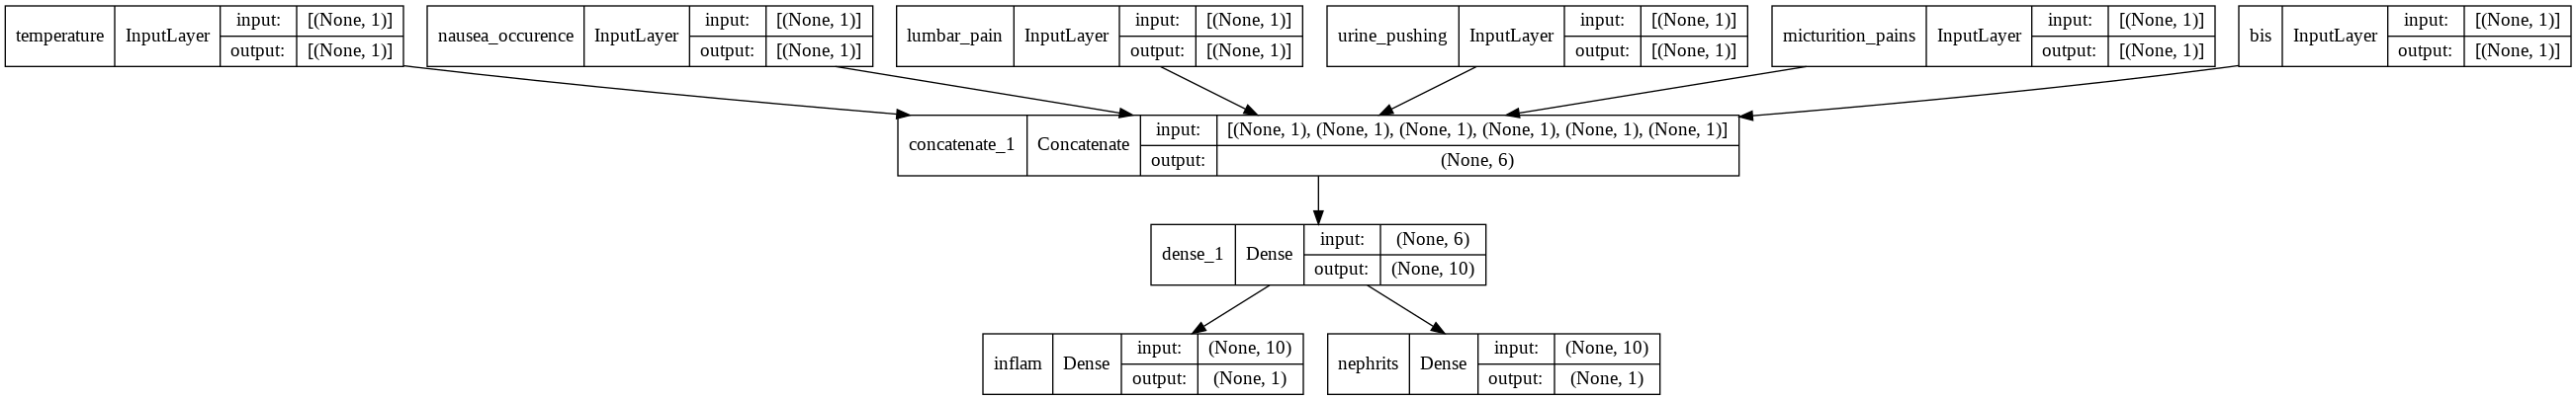

In [ ]:
# Display the multiple input/output model and view the summary


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 temperature (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 nausea_occurence (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 lumbar_pain (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 urine_pushing (InputLayer)     [(None, 1)]          0           []                               
                                                                                            

#### Compile the model

In [ ]:
# Compile the model


#### Fit the model 

In [ ]:
# Define training inputs and outputs

inputs_train = {'temperature': temp_train, 'lumbar_pain': lumbp_train,
               'urine_pushing': up_train, 'micturition_pains': mict_train, 'bis': bis_train, 'nausea_occurence': nocc_train, }

outputs_train = {'inflam': inflam_train, 'nephrits': nephr_train}

In [ ]:

inputs_test = {'temperature': temp_test, 'lumbar_pain': lumbp_test,
               'urine_pushing': up_test, 'micturition_pains': mict_test, 'bis': bis_test, 'nausea_occurence': nocc_test, }

outputs_test = {'inflam': inflam_test, 'nephrits': nephr_test}

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
# Train the model


#### Plot the learning curves

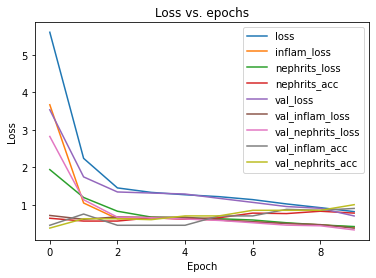

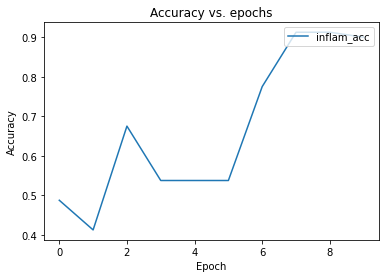

In [ ]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [ ]:
# Evaluate the model

